Agora iremos trabalhar com outra parte relacionada à *análise facial*.

Iremos nos aprofundar em como é possível **extrair os olhos, nariz ou boca** e verificar se é possível **capturar mudanças**, como por exemplo, o **abrir e fechar dos olhos ou boca**. Isto também é interessante para **identificarmos emoções, expressões faciais**.

Utilizaremos o **Dlib**, uma biblioteca em python que trabalha com alguns classificadores pré-treinados para **extrair pontos** que irão **segmentar a região do rosto**.

Para baixar o classificador pré-treinado:
[Download classificador](https://github.com/davisking/dlib-models/blob/master/shape_predictor_68_face_landmarks.dat.bz2)

In [90]:
import cv2
import numpy as np
import dlib
import matplotlib.pyplot as plt

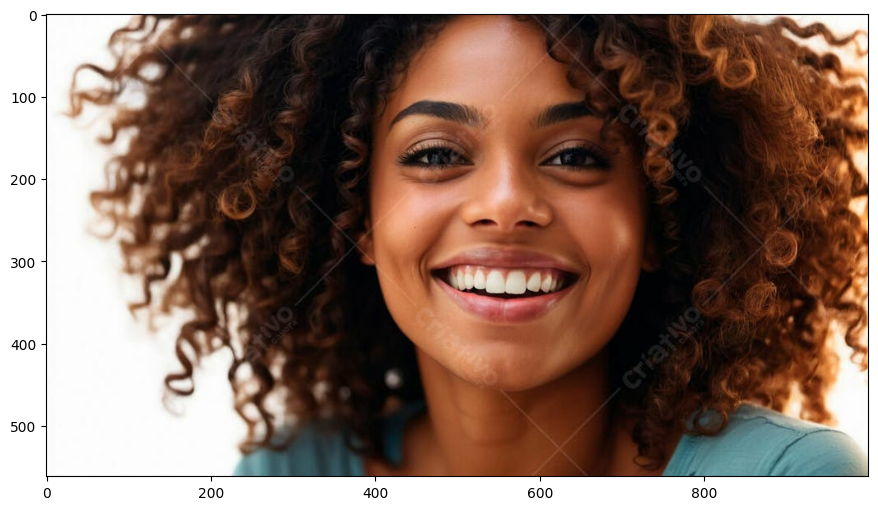

In [91]:
img = cv2.imread('images/mulher_sorrindo.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.imshow(img)

Alguns dos classificadores pré-treinados da biblioteca **Dlib** identificam **68 pontos de referencia facial** e outro **5 pontos**. São usados para identificar características faciais em imagens.

O modelo de 68 pontos é um detector de **landmarks (pontos de referência)** faciais que identifica posições específicas no rosto. Esses pontos também são chamados de **marcos faciais**.

In [92]:
# Adquirindo o detector de faces do dlib
face_detector = dlib.get_frontal_face_detector()

# Carrega o classificador pré-treinado de pontos de referência no rosto
landmark_predictor = dlib.shape_predictor('classifiers_dlib/shape_predictor_68_face_landmarks.dat')

O número 1 do 2° parâmetro da função indica que essa imagem não vai ser dimensionada para identificar muitos rostos. Por exemplo, se tivermos uma imagem onde há rostos com diferentes dimensões (rostos pertos e outros muito longe), talvez o classificador não seja capaz de identificar. Nesse caso, é possível aumentar esse parâmetro, onde a imagem será ampliada para poder identificar rostos com dimensões pequenas na imagem.

In [93]:
def note_face(image):
    img_copy = image.copy()
    rectangles = face_detector(image, 1)

    if len(rectangles) == 0:
        return None
    
    for k, d in enumerate(rectangles):
        cv2.rectangle(img_copy, (d.left(), d.top()),
                      (d.right(), d.bottom()),
                      (255,255,0),
                      2)
    
    return img_copy

### Como funciona o Dlib?

Diferentemente de outros classificadores de imagem, ao invés de trabalhar com imagens de fotografias como vimos anteriormente, ele trabalha com uma imagem que utiliza o **HOG (Histogram of Oriented Gradient)** ou **Histograma de Gradiente Orientado**.

**Passos:**
- **Deteção do rosto**: O modelo primeiro detecta a face no quadro. Geralmente utiliza o algorítmo HOG para encontrar a região do rosto.
- **Previsão dos pontos**: Após encontrar o rosto, o modelo aplica um regressor que estima as coordenadas (x,y) de cada um dos 68 pontos.

Em resumo, o algorítmo HOG é usado para detectar o rosto antes de aplicar o modelo de landmarks. Ele identifica o rosto analisando padrões de gradientes na imagem.

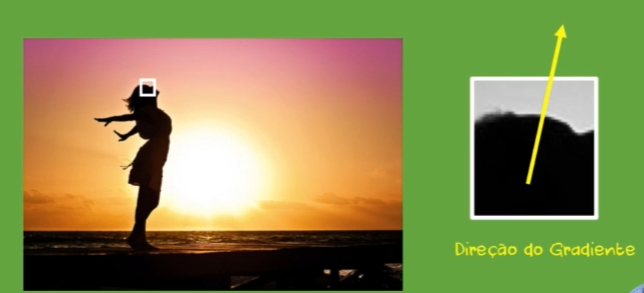

Este histograma delimita todo o contorno da imagem, exemplo:

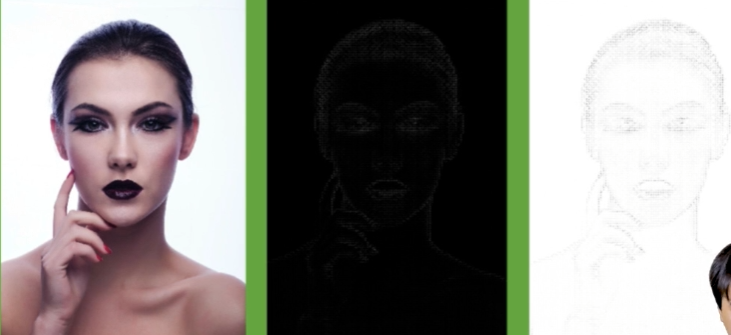


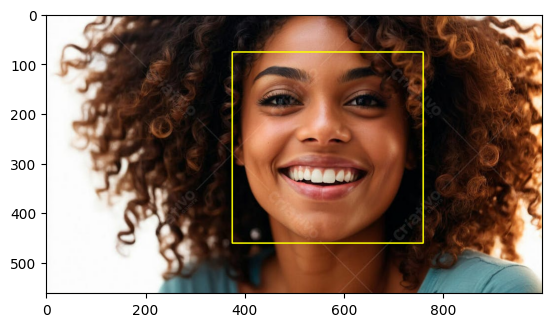

In [94]:
annotated_img = note_face(img)
plt.imshow(annotated_img)

**Função que detecta o rosto e preve os valores em x e y dos marcos faciais**

In [95]:
def get_landmarks(image):
    faces = face_detector(image, 1)

    if len(faces) == 0:
        return None
    
    landmarks = []

    # Laço de repetição caso seja encontrado mais de um rosto
    for face in faces:
        # Adquire os landmarks do rosto detectado
        landmarks_face = landmark_predictor(image, face)

        # Adquire todos os pontos da face da iteração atual e converte para uma matriz
        landmarks_face = np.matrix([[p.x, p.y] for p in landmarks_face.parts()])

        # Adiciona os pontos de referência no array
        landmarks.append(landmarks_face)
    
    return landmarks

In [96]:
img_landmarks = get_landmarks(img)
print('Rostos encontrados: ', len(img_landmarks))
print('Quantidade de pontos: ', len(img_landmarks[0]))

Rostos encontrados:  1
Quantidade de pontos:  68


**Função para anotar os marcos faciais na imagens**

In [97]:
def anote_landmarks(image, landmarks):
    for land in landmarks:
        index = 1
        for center in land:
            # center é um array bi dimensional [[x, y]] então precisamos selecionar cada valor (x e y) da seguinte forma:
            x = center[0,0] # linha 0 coluna 0
            y = center[0,1] # linha 0 coluna 1

            # Adiciona o circulo no ponto do marco facial
            cv2.circle(image, (x, y),
                       radius=2,
                       color=(255,255,0),
                       thickness=3)

            # Adicionará um texto, que sera referente ao número do ponto
            cv2.putText(image, str(index),
                        (x,y), # posição do texto
                        cv2.FONT_HERSHEY_SIMPLEX, # tipo da fonte
                        0.5, # tamanho da fonte
                        (255,255,255), # cor
                        1)
            index += 1

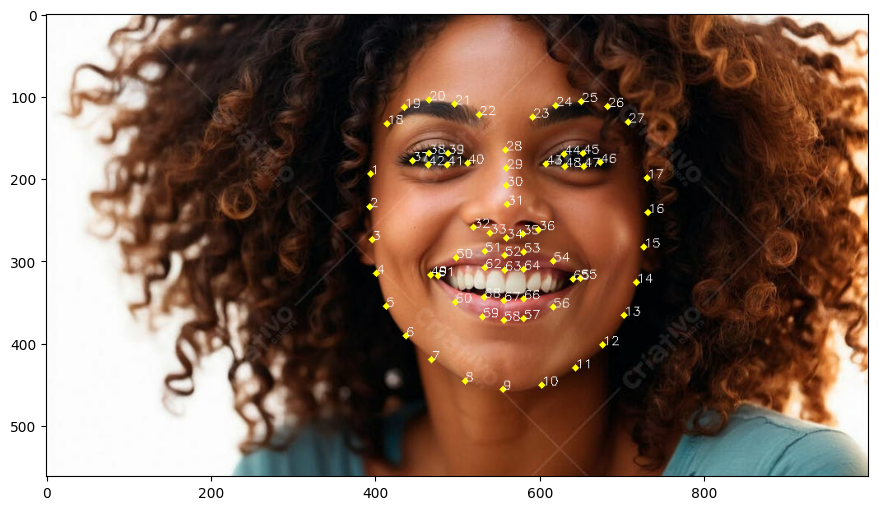

In [98]:
img_copy = img.copy()
anote_landmarks(img_copy, img_landmarks)

plt.figure(figsize=(12,6))
plt.imshow(img_copy)